In [ ]:
!pip install wordcloud


# Importing

In [106]:


import numpy as np 
import pandas as pd
import tweepy


# API twitter

In [ ]:
# Your API credentials
consumer_key= 'Your_key'
consumer_secret= 'Your_key'
access_token= 'Your_key'
access_token_secret= 'Your_key'

In [ ]:
# Authenticate API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Keywords and limit for tweets
keywords = ['day', 'good', 'bad']
limit = 7920

In [ ]:
# Collect tweets
tweets_text = []
for keyword in keywords:
    tweets = tweepy.Cursor(api.search_tweets, q=keyword, tweet_mode='extended').items(limit)
    for tweet in tweets:
        tweets_text.append(tweet.full_text)

In [ ]:
# Create a DataFrame and save to CSV
df = pd.DataFrame(tweets_text, columns=['tweet'])
df.to_csv('Extracted Tweets Dataset.csv', index=False)

# Loading csv

In [107]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING='ISO-8859-1'
df = pd.read_csv("Tweet data.csv",
                encoding = DATASET_ENCODING,names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
231517,0,1978980297,Sun May 31 01:09:45 PDT 2009,NO_QUERY,shamoosey93,is using half an hour to actually wake up... t...
1102174,4,1970903034,Sat May 30 05:36:18 PDT 2009,NO_QUERY,deur,@ericbryant I need to share this truth with my...
101786,0,1794621103,Thu May 14 06:12:53 PDT 2009,NO_QUERY,davidjwalker,Just dropped my son off at his last day of pre...
293845,0,1996432202,Mon Jun 01 15:04:26 PDT 2009,NO_QUERY,punkmorvs,eventually i am NEARLY done packing for flight...
778762,0,2322765647,Wed Jun 24 23:13:45 PDT 2009,NO_QUERY,Anergnohc,@casperlove Oh yeah..if you'll be there for a ...


In [108]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [109]:
df.shape

(1600000, 6)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [111]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [112]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

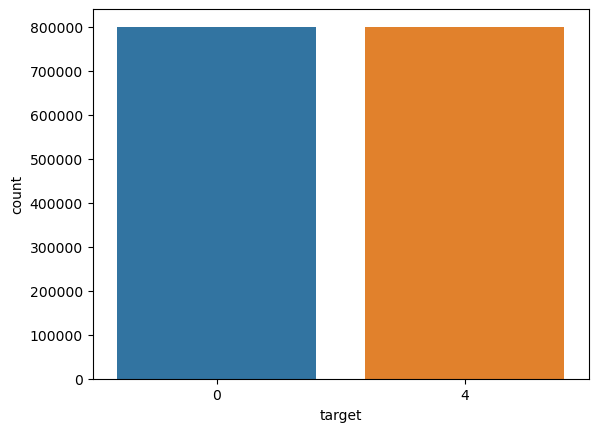

In [113]:
import seaborn as sns
sns.countplot(data=df,x='target')

# DATA PREPROCESSING

In [114]:
data = df[['text','target']]

In [115]:
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [116]:
data['target']=data['target'].replace(4,1)
data['target'].value_counts()

C:\Users\vijay\AppData\Local\Temp\ipykernel_15100\389418106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']=data['target'].replace(4,1)


0    800000
1    800000
Name: target, dtype: int64

In [117]:
data_pos = data[data['target']==1]
data_neg = data[data['target']==0]

data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

dataset = pd.concat([data_pos,data_neg])
dataset.shape

(40000, 2)

In [118]:
dataset.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [119]:
dataset['text']=dataset['text'].str.lower()
dataset.head()

,text,target
800000,i love @health4uandpets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@darealsunisakim thanks for the twitter add, s...",1
800003,being sick can be really cheap when it hurts t...,1
800004,@lovesbrooklyn2 he has that effect on everyone,1


# Removing Stopwords

In [120]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [121]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

# Removing Punctuations

In [122]:
from string import punctuation 
def clean_punctuations(text):
    translator = str.maketrans('', '', punctuation)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: clean_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

# Removing Repeating Characters

In [123]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

# Removing URLs

In [124]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

# Remove digits

In [125]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

# Tokenization

In [129]:
from nltk.tokenize import sent_tokenize
dataset['text'] = dataset['text'].apply(lambda text: sent_tokenize(text))

In [130]:
dataset['text'].tail()

19995    [not much time off weekend work trip malmï¿½ f...
19996                                   [one day holidays]
19997                   [feeling right  hate damn humprey]
19998    [geezi hv read whole book personality types em...
19999    [threw sign donnie bent over get but thingee m...
Name: text, dtype: object

In [131]:
dataset['text'].head()

800000                  [love healthuandpets u guys r best]
800001    [im meeting one besties tonight cant wait  gir...
800002    [darealsunisakim thanks twitter add sunisa got...
800003    [sick really cheap hurts much eat real food pl...
800004                      [lovesbrooklyn effect everyone]
Name: text, dtype: object

In [132]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000                  [love healthuandpets u guys r best]
800001    [im meeting one besties tonight cant wait  gir...
800002    [darealsunisakim thanks twitter add sunisa got...
800003    [sick really cheap hurts much eat real food pl...
800004                      [lovesbrooklyn effect everyone]
Name: text, dtype: object

In [133]:
dataset.head()

,text,target
800000,[love healthuandpets u guys r best],1
800001,[im meeting one besties tonight cant wait gir...,1
800002,[darealsunisakim thanks twitter add sunisa got...,1
800003,[sick really cheap hurts much eat real food pl...,1
800004,[lovesbrooklyn effect everyone],1


In [134]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# WordCloud

**For negative tweets**

(-0.5, 1599.5, 799.5, -0.5)

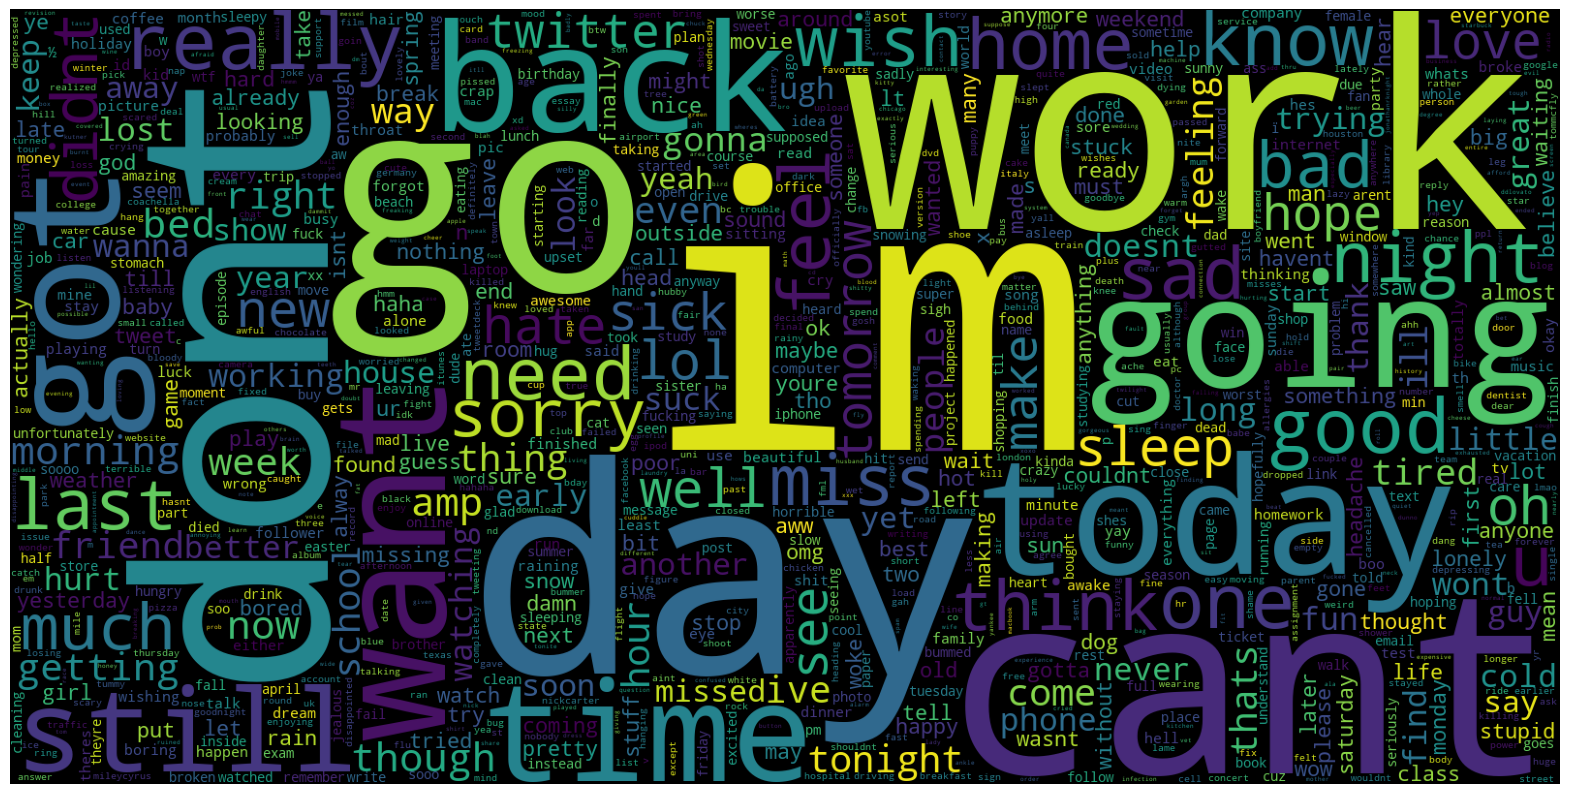

In [135]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = dataset[dataset['target']==0]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

**For positive Tweets**

(-0.5, 1599.5, 799.5, -0.5)

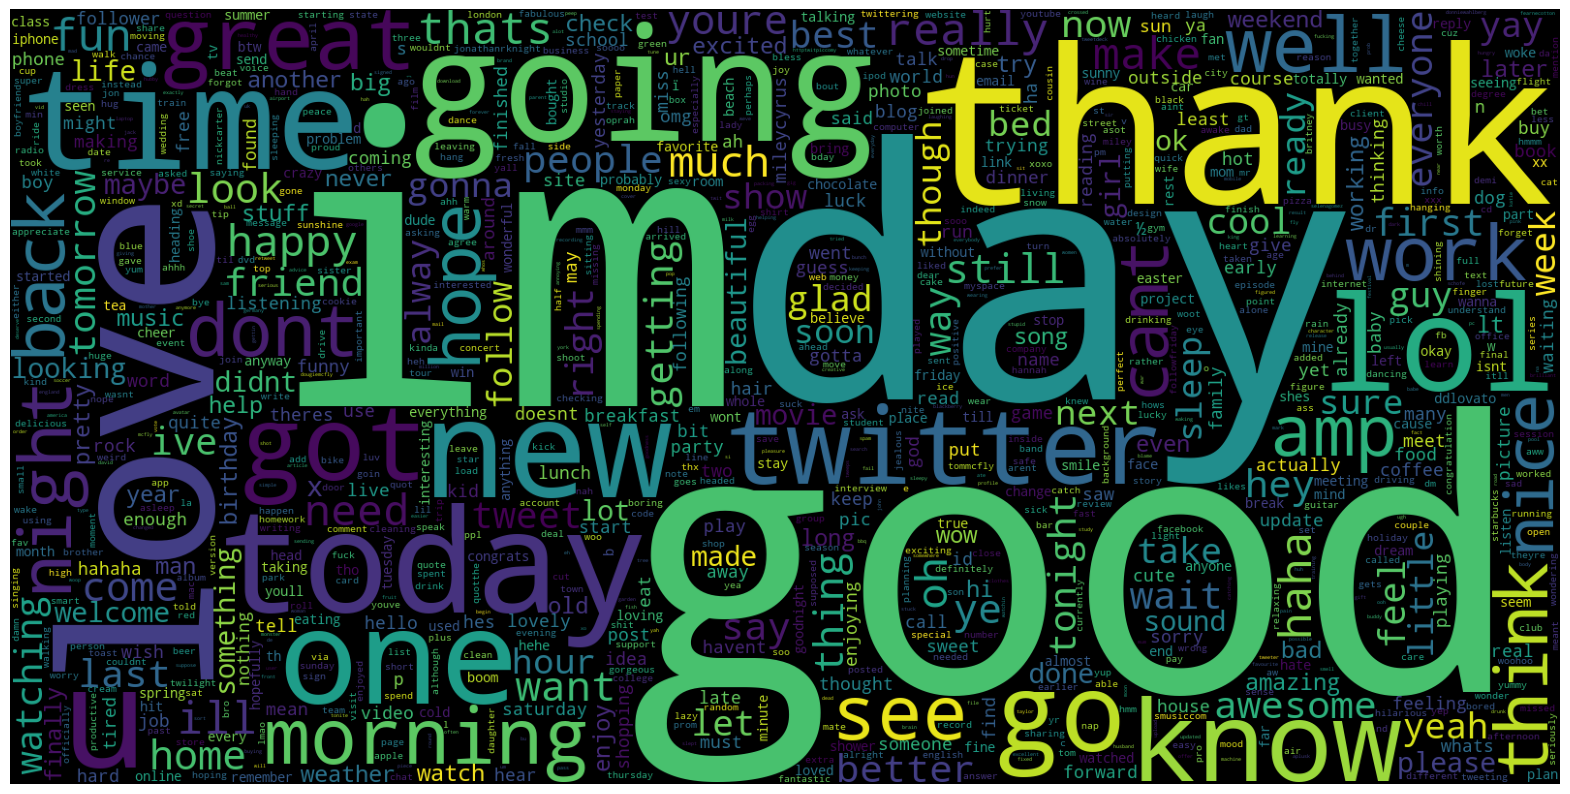

In [136]:
data_pos = dataset[dataset['target']==1]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.axis('off')

In [137]:
new_data=dataset
new_data['text'] = dataset['text'].apply(lambda x: ' '.join(x) )
new_data.head()

,text,target
800000,love healthuandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn effect everyone,1


# Splitting data into training and testing

In [138]:
X=new_data.text
y=new_data.target

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,
                                                    random_state =0,stratify = y)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(40000,)
(32000,)
(8000,)


# Feature Extraction

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  5000


In [141]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(32000, 5000)
(8000, 5000)


In [142]:
y_train.shape

(32000,)

# Modeling

In [143]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [144]:
train_pred=clf.predict(X_train)

In [145]:
y_pred.shape

(8000,)

In [146]:
from sklearn.metrics import accuracy_score,confusion_matrix
train_acc=accuracy_score(y_train,train_pred)
test_acc=accuracy_score(y_test,y_pred)
print(train_acc)
print(test_acc)
cfm1=confusion_matrix(y_train,train_pred)
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print(cfm1)

0.93478125
0.75825
[[2976 1024]
 [ 910 3090]]
[[14877  1123]
 [  964 15036]]


<Axes: >

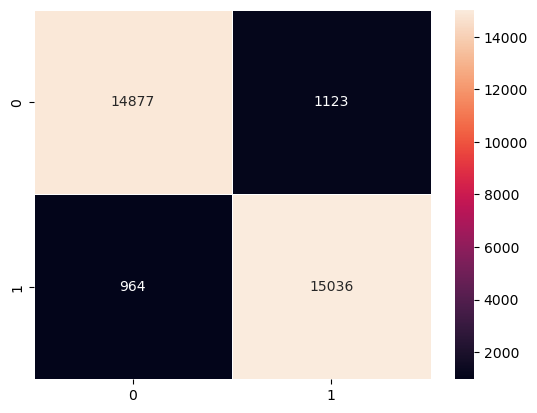

In [147]:
import seaborn as sns
sns.heatmap(cfm1,annot=True,fmt='',linewidths=0.5)

<Axes: >

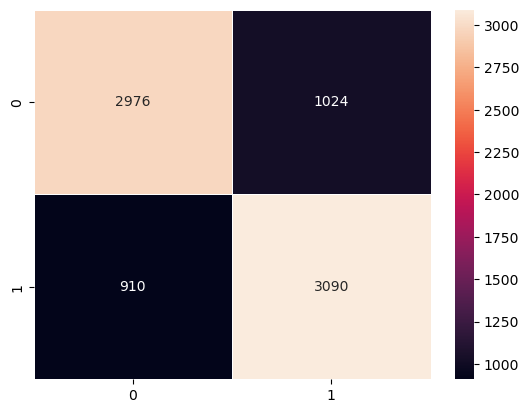

In [148]:
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

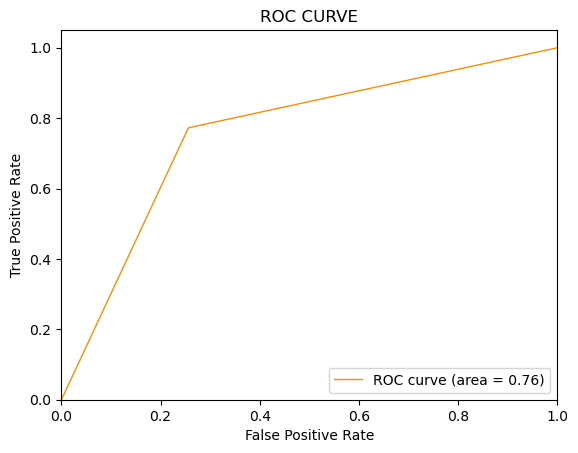

In [149]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()


# Prediction of label of tweets

In [150]:
def preprocess(text):
    text = text.lower()
    text = cleaning_stopwords(text)
    text = clean_punctuations(text)
    text = cleaning_repeating_char(text)
    text = cleaning_URLs(text)
    text = cleaning_numbers(text)
    return text


In [151]:

def predict_new_tweets(file_path, vectoriser, clf, output_file_path):
    new_data = pd.read_csv(file_path, encoding='ISO-8859-1')
    new_data['cleaned_text'] = new_data['tweet'].apply(preprocess)
    transformed_tweets = vectoriser.transform(new_data['cleaned_text'])
    predictions = clf.predict(transformed_tweets)
    new_data['predicted_label'] = predictions
    new_data.to_csv(output_file_path, index=False)


In [152]:
file_path = 'Extracted Tweets Dataset.csv' 
output_file_path = 'Predicted_Tweets.csv' 

In [153]:

predict_new_tweets(file_path, vectoriser, clf, output_file_path)

In [154]:
df=pd.read_csv(output_file_path )

In [155]:
df.head()

,tweet,cleaned_text,predicted_label
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test httpsgooglmfqv andr...,1
1,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle...,1
2,We love this! Would you go? #talk #makememorie...,love this would go talk makememories unplug re...,1
3,I'm wired I know I'm George I was made that wa...,im wired know im george made way iphone cute ...,1
4,What amazing service! Apple won't even talk to...,amazing service apple wont even talk question ...,0
